# Develop a simple linear regression model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

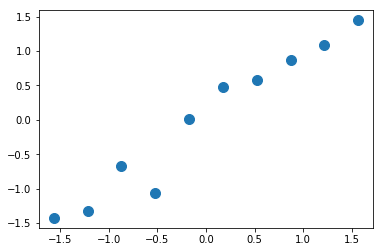

In [3]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
y_train_norm = (y_train - np.mean(y_train))/np.std(y_train)

plt.plot(X_train_norm, y_train_norm, 'o', markersize=10)

#### Building dataset: method 1

In [4]:
ds_x = tf.data.Dataset.from_tensor_slices(tf.cast(X_train_norm, tf.float32))
ds_x

<TensorSliceDataset shapes: (1,), types: tf.float32>

In [5]:
ds_y = tf.data.Dataset.from_tensor_slices(tf.cast(y_train_norm, tf.float32))
ds_y

<TensorSliceDataset shapes: (), types: tf.float32>

#### Building dataset: method 2

In [6]:
ds = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32),
                                         tf.cast(y_train_norm, tf.float32)))

ds

<TensorSliceDataset shapes: ((1,), ()), types: (tf.float32, tf.float32)>

### Repeat,  shuffle, and batch:

In [7]:
ds = tf.data.Dataset.from_tensor_slices((tf.cast(X_train, tf.float32),
                                         tf.cast(y_train, tf.float32)))

ds = ds.shuffle(buffer_size=len(y_train))
ds = ds.batch(4)
ds = ds.repeat()


next(iter(ds))

(<tf.Tensor: id=31, shape=(4, 1), dtype=float32, numpy=
 array([[3.],
        [7.],
        [0.],
        [6.]], dtype=float32)>,
 <tf.Tensor: id=32, shape=(4,), dtype=float32, numpy=array([2. , 7.4, 1. , 6.6], dtype=float32)>)

In [8]:
for b in ds.take(4):
    print(b[1].numpy(), '      <---->         ', b[0].shape, b[1].shape)



[2.  7.4 1.  6.6]       <---->          (4, 1) (4,)
[8.  6.3 1.3 9. ]       <---->          (4, 1) (4,)
[3.1 5. ]       <---->          (2, 1) (2,)
[1.  6.3 7.4 8. ]       <---->          (4, 1) (4,)


In [9]:
ds = tf.data.Dataset.from_tensor_slices((tf.cast(X_train, tf.float32),
                                         tf.cast(y_train, tf.float32)))
ds = ds.shuffle(buffer_size=len(y_train))
ds = ds.repeat()
ds = ds.batch(4)

for b in ds.take(4):
    print(b[1].numpy(), '      <---->         ', b[0].shape, b[1].shape)


[1.  6.6 8.  6.3]       <---->          (4, 1) (4,)
[9.  3.1 2.  1.3]       <---->          (4, 1) (4,)
[5.  7.4 6.3 6.6]       <---->          (4, 1) (4,)
[7.4 2.  5.  1.3]       <---->          (4, 1) (4,)


## Define the model

In [10]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable([0.0], name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w * x + self.b

model = MyModel()
model

## Define the loss function

In [11]:
# 1. manually define MSE loss:

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: id=105, shape=(), dtype=float32, numpy=0.25>

In [35]:
# 2. using existing API

loss_fn = tf.keras.losses.MSE

loss_fn(yt, yp)

<tf.Tensor: id=1605, shape=(), dtype=float32, numpy=0.25>

## Training: method 1

### Calculate gradients and update the weights manually

In [12]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)


In [20]:
model = MyModel()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []

num_epochs = 200
batch_size = 1
log_steps = 100
learning_rate = 0.001
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds_orig = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32),
                                         tf.cast(y_train_norm, tf.float32)))

ds = ds_orig.shuffle(buffer_size=len(y_train))
ds = ds.repeat()
ds = ds.batch(batch_size)

#for epoch in range(num_epochs):
    
    #total_loss = 
for i, batch in enumerate(ds.take(num_epochs * steps_per_epoch)):
    Ws.append(model.w.numpy()[0])
    bs.append(model.b.numpy())
    #print(batch[1].numpy())
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    #print(model(bx).numpy(), by.numpy())

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:2d} Step {:2d} Loss {:.4f}'.format(
            i%steps_per_epoch, i, loss_val))

    
    

Epoch  0 Step  0 Loss 1.1411
Epoch  0 Step 100 Loss 0.7642
Epoch  0 Step 200 Loss 0.8105
Epoch  0 Step 300 Loss 0.0838
Epoch  0 Step 400 Loss 0.3697
Epoch  0 Step 500 Loss 0.0140
Epoch  0 Step 600 Loss 0.5075
Epoch  0 Step 700 Loss 0.1229
Epoch  0 Step 800 Loss 0.1176
Epoch  0 Step 900 Loss 0.0236
Epoch  0 Step 1000 Loss 0.0117
Epoch  0 Step 1100 Loss 0.0066
Epoch  0 Step 1200 Loss 0.0579
Epoch  0 Step 1300 Loss 0.0126
Epoch  0 Step 1400 Loss 0.3487
Epoch  0 Step 1500 Loss 0.0295
Epoch  0 Step 1600 Loss 0.0013
Epoch  0 Step 1700 Loss 0.0305
Epoch  0 Step 1800 Loss 0.0983
Epoch  0 Step 1900 Loss 0.0018


[0.9559026] -2.7873612e-05


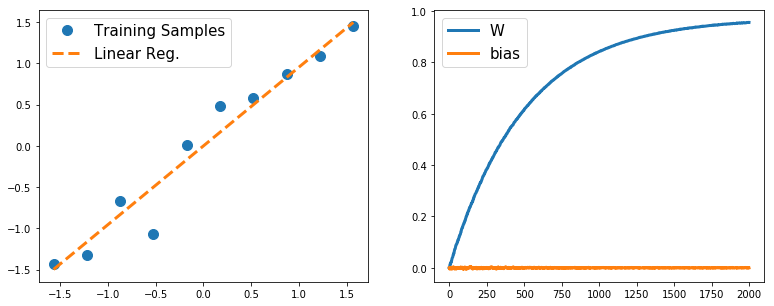

In [23]:
print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train_norm, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Reg.'], fontsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'bias'], fontsize=15)
plt.show()

## Training: method 2

### Compile the model

In [25]:
model = MyModel()

model.compile(optimizer='sgd', 
              loss=loss_fn)

#model.summary()

In [26]:
print(model([1]))

model.summary()

tf.Tensor([0.], shape=(1,), dtype=float32)
Model: "my_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
ds_orig = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32),
                                         tf.cast(y_train_norm, tf.float32)))

num_epochs = 200
batch_size = 1

ds = ds_orig.shuffle(buffer_size=len(y_train))
ds = ds.repeat()
ds = ds.batch(batch_size=batch_size)

steps_per_epoch = int(np.ceil(len(X_train) / batch_size))

model.fit(ds, epochs=num_epochs, 
          steps_per_epoch=steps_per_epoch)


Epoch 1/200
10/10 [==============================] - 0s 17ms/step - loss: 0.9863
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.9496
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.9143
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.8804
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.8479
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.8166
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.7865
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.7577
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.7299
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.7033
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 0.6777
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.6531
Epoch 13/200
10/10 [================

10/10 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 102/200
10/10 [==============================] - 0s 1000us/step - loss: 0.0685
Epoch 103/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0678
Epoch 104/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0672
Epoch 105/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0666
Epoch 106/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0661
Epoch 107/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0655
Epoch 108/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0650
Epoch 109/200
10/10 [==============================] - 0s 992us/step - loss: 0.0645
Epoch 110/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 111/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0636
Epoch 112/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 113/200
10/10 [====

10/10 [==============================] - 0s 1ms/step - loss: 0.0526


[0.9559419] 1.6738632e-05


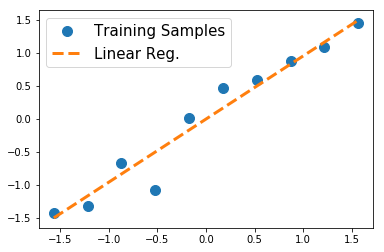

In [29]:
print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


plt.plot(X_train_norm, y_train_norm, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Reg.'], fontsize=15)

plt.show()